In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from operator import itemgetter

In [ ]:
main_filename = '/content/drive/MyDrive/Team ASAPP 1B/dataset reduction/smaller datasets/delexed_removed_main.json'
with open(main_filename, 'r') as file:
    data = json.load(file)
all_conversations = data['train'] + data['dev'] + data['test'] # ignore train test dev keys
df = pd.json_normalize(all_conversations)


Average and Distribution of Metrics:
       total_utterances  customer_utterances  agent_utterances  \
count      10042.000000         10042.000000      10042.000000   
mean          22.005875             8.899821          9.473113   
min            6.000000             1.000000          1.000000   
max           75.000000            39.000000         31.000000   

       action_utterances     has_email      has_name  has_phone_number  \
count       10042.000000  10042.000000  10042.000000      10042.000000   
mean            3.632942      0.245569      0.751643          0.051384   
min             1.000000      0.000000      0.000000          0.000000   
max            24.000000      1.000000      1.000000          1.000000   

       has_order_id   char_length  
count  10042.000000  10042.000000  
mean       0.445828    904.182633  
min        0.000000    157.000000  
max        1.000000   3156.000000  

Most Common Flows:
flow
storewide_query         1094
purchase_dispute        10

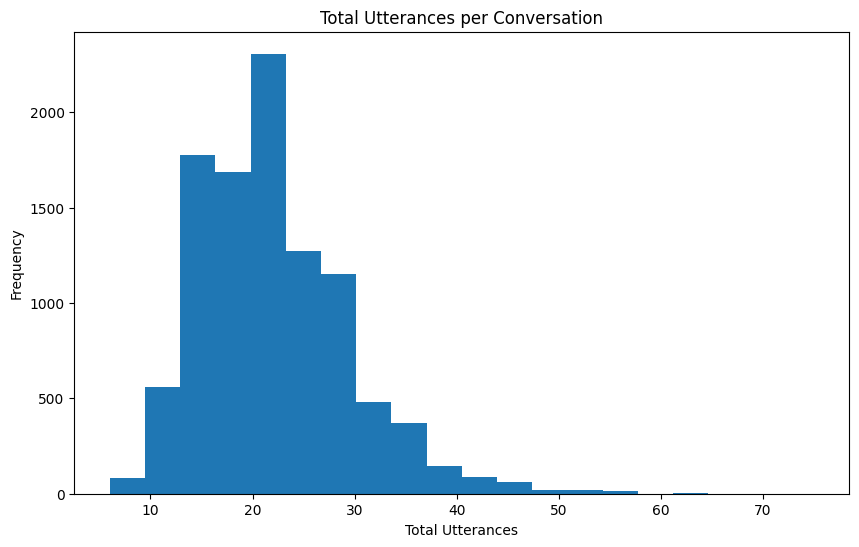

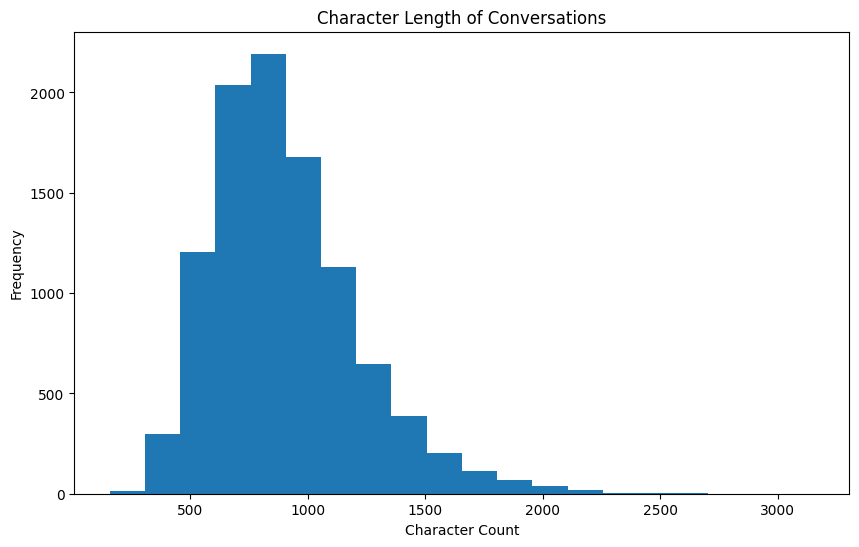

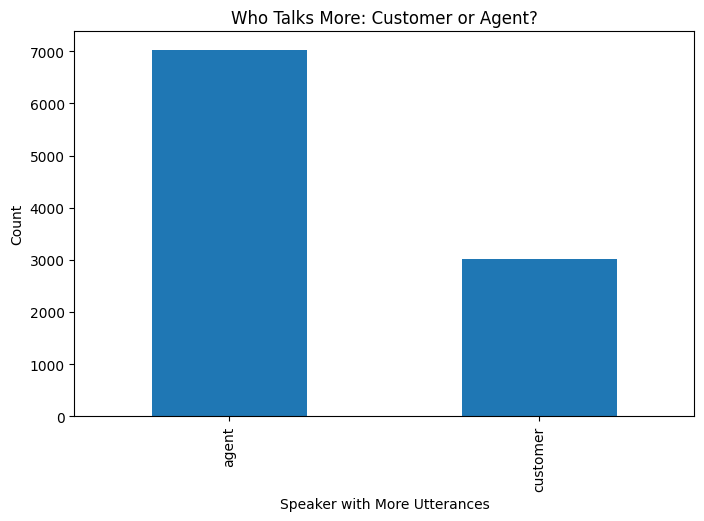


Most Common Labels and Their Counts:
scenario.personal.customer_name: 10042
scenario.personal.member_level: 10042
scenario.order.street_address: 10042
scenario.order.full_address: 10042
scenario.order.city: 10042
scenario.order.state: 10042
scenario.order.zip_code: 10042
scenario.product.names: 10042
scenario.product.amounts: 10042
scenario.flow: 10042
scenario.subflow: 10042
scenario.personal.phone: 9431
scenario.order.num_products: 7457
scenario.order.products: 7457
scenario.order.order_id: 5123
scenario.personal.username: 4868
scenario.personal.email: 4661
scenario.personal.account_id: 3391
scenario.order.purchase_date: 2090
scenario.order.shipping_status: 1781
scenario.order.payment_method: 1240
scenario.order.packaging: 1070
scenario.personal.pin_number: 351
scenario.personal.security_answer: 257
scenario.personal.password: 94
scenario.personal.order_id: 84


In [ ]:
metrics = []

for _, row in df.iterrows():
    # check for presence
    # has_email = pd.notna(row.get('scenario.personal.email'))
    # has_name = pd.notna(row.get('scenario.personal.customer_name'))
    # has_phone_number = pd.notna(row.get('scenario.personal.phone'))
    # has_order_id = pd.notna(row.get('scenario.order.order_id'))

    conversation = row['original']
    total_utterances = len(conversation)
    customer_utterances = sum(1 for msg in conversation if msg[0] == 'customer')
    agent_utterances = sum(1 for msg in conversation if msg[0] == 'agent')
    action_utterances = sum(1 for msg in conversation if msg[0] == 'action')
    has_email = has_name = has_phone_number = has_order_id = 0

    for msg in conversation:
      if str(row.get('scenario.personal.email')).lower() in msg[1].lower():
        has_email = 1
      if str(row.get('scenario.personal.customer_name')).lower() in msg[1].lower():
        has_name = 1
      if str(row.get('scenario.personal.phone')).lower() in msg[1].lower():
        has_phone_number = 1
      if str(row.get('scenario.order.order_id')).lower() in msg[1].lower():
        has_order_id = 1

    # who talks more
    if customer_utterances > agent_utterances:
      who_talks_more = 'customer'
    else : who_talks_more = 'agent'

    # char count in convo
    char_length = sum(len(msg[1]) for msg in conversation if isinstance(msg[1], str))

    metrics.append({
        'total_utterances': total_utterances,
        'customer_utterances': customer_utterances,
        'agent_utterances': agent_utterances,
        'action_utterances': action_utterances,
        'who_talks_more': who_talks_more,
        'has_email': has_email,
        'has_name': has_name,
        'has_phone_number': has_phone_number,
        'has_order_id': has_order_id,
        'flow': row.get('scenario.flow'),
        'subflow': row.get('scenario.subflow'),
        'char_length': char_length,
        'has_email': has_email,
        'has_name': has_name,
        'has_phone_number': has_phone_number,
        'has_order_id': has_order_id
    })

metrics_df = pd.DataFrame(metrics)
# print(metrics_df.head())

print("\nAverage and Distribution of Metrics:")
print(metrics_df.describe().loc[['count', 'mean', 'min', 'max']])

# most common flows and subflows
print("\nMost Common Flows:")
print(metrics_df['flow'].value_counts().head(10))
print("\nMost Common Subflows:")
print(metrics_df['subflow'].value_counts().head(10))

# graph: utterance length per convo
plt.figure(figsize=(10, 6))
plt.hist(metrics_df['total_utterances'], bins=20)
plt.title("Total Utterances per Conversation")
plt.xlabel("Total Utterances")
plt.ylabel("Frequency")
plt.show()

# graph: character length distribution
plt.figure(figsize=(10, 6))
plt.hist(metrics_df['char_length'], bins=20)
plt.title("Character Length of Conversations")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

# graph: Who talks more
plt.figure(figsize=(8, 5))
metrics_df['who_talks_more'].value_counts().plot(kind='bar')
plt.title("Who Talks More: Customer or Agent?")
plt.xlabel("Speaker with More Utterances")
plt.ylabel("Count")
plt.show()

# identify cols that start with 'scenario' to capture all scenario-related fields
label_columns = [col for col in df.columns if col.startswith('scenario')]

# initialize dict
label_counts = {}

# count the presence of each label in the dataset
for label in label_columns:
    # count non-null
    label_counts[label] = df[label].notna().sum()

# sort labels by their frequency of appearance
sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

print("\nMost Common Labels and Their Counts:")
for label, count in sorted_labels:
    print(f"{label}: {count}")


In [ ]:
print(df.columns)

Index(['convo_id', 'original', 'scenario.personal.customer_name',
       'scenario.personal.email', 'scenario.personal.member_level',
       'scenario.personal.phone', 'scenario.personal.username',
       'scenario.order.street_address', 'scenario.order.full_address',
       'scenario.order.city', 'scenario.order.num_products',
       'scenario.order.order_id', 'scenario.order.packaging',
       'scenario.order.payment_method', 'scenario.order.products',
       'scenario.order.purchase_date', 'scenario.order.state',
       'scenario.order.zip_code', 'scenario.product.names',
       'scenario.product.amounts', 'scenario.flow', 'scenario.subflow',
       'scenario.personal.account_id', 'scenario.order.shipping_status',
       'scenario.personal.pin_number', 'scenario.personal.security_answer',
       'scenario.personal.order_id', 'scenario.personal.password'],
      dtype='object')
